In [12]:
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,BatchNormalization,Activation
import matplotlib.pyplot as plt

In [5]:
os.chdir("E:\KU\Project ML\Git Push")

In [6]:
x_train = np.load( "datasets/x_train.npy" ) / 255
y_train = np.load( "datasets/y_train.npy" ) / 96
x_test = np.load( "datasets/x_test.npy" ) / 255
y_test = np.load( "datasets/y_test.npy" ) / 96

y_train = np.reshape( y_train , ( -1 , 1 , 1 , 30 ))
y_test = np.reshape( y_test , ( -1 , 1 , 1 , 30 ))

In [7]:
model=Sequential()
model.add(Conv2D( 256 , input_shape=( 96 , 96 , 1 ) , kernel_size=( 3 , 3 ) , strides=2 , activation='relu' )),

model.add(Conv2D( 256 , kernel_size=( 3 , 3 ) , strides=2 , activation='relu' ))
model.add(BatchNormalization())

model.add(Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ))
model.add(Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ))
model.add(BatchNormalization())

model.add(Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ))
model.add(Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ))
model.add(BatchNormalization())

model.add(Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ))
model.add(Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ))
model.add(BatchNormalization())

model.add(Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ))
model.add(Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ))
model.add(BatchNormalization(),

model.add(Conv2D( 30 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ))
model.add(Conv2D( 30 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ))
model.add(Conv2D( 30 , kernel_size=( 3 , 3 ) , strides=1 ))
model.compile( loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam( lr=0.0001 ) , metrics=[ 'mse' ] )

In [ ]:
model.fit( x_train , y_train , epochs=25 , batch_size=50 , validation_data=( x_test , y_test ) )

In [9]:
model=tf.keras.models.load_model('Multilayer-CNN.model')

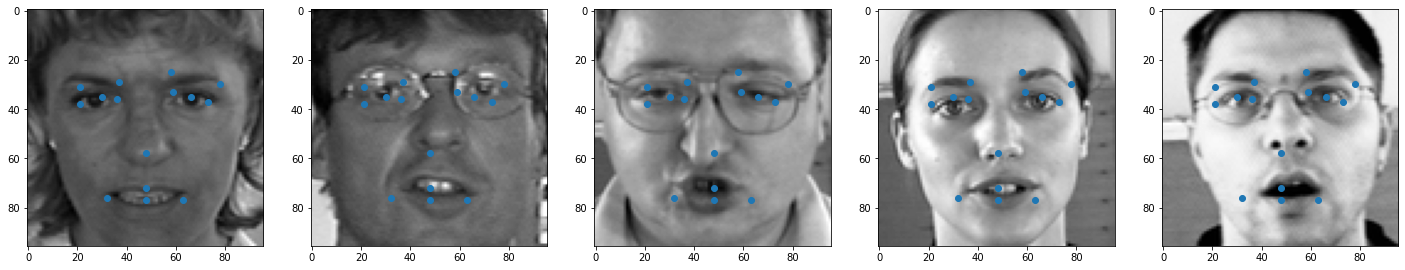

In [20]:

fig = plt.figure(figsize=( 50 , 50 ))

for i in range( 1 , 6 ):
    sample_image = np.reshape( x_test[i] * 255  , ( 96 , 96 ) ).astype( np.uint8 )
    pred = model.predict( x_test[ i : i +1  ] ) * 96
    pred = pred.astype( np.int32 )
    pred = np.reshape( pred[0 , 0 , 0 ] , ( 15 , 2 ) )
    fig.add_subplot( 1 , 10 , i )
    plt.imshow( sample_image.T , cmap='gray' )
    plt.scatter( pred[ : , 0 ] , pred[ : , 1 ] )
    
plt.show()